In [39]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#import tensorflow as tf
#from tensorflow import keras

from emnist import list_datasets, extract_training_samples, extract_test_samples

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def flatten(data, dim_img = (28, 28)):
    return data.reshape(len(data), dim_img[0] * dim_img[1])

# 1. Load data

In [2]:
print(list_datasets())
tipus = "balanced"

X_full_train, y_full_train = extract_training_samples(tipus)
X_test, y_test = extract_test_samples(tipus)

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size = 0.1, random_state = 123)
# del X_full_train, y_full_train # Free memory
X_full_train.shape

(112800, 28, 28)

# 2. Descriptius, visualització

In [122]:
n = len(X_train) + len(X_val) + len(X_test)
print("Train prop: ", len(X_train) / n * 100)
print("Validation prop: ", len(X_val) / n * 100)
print("Test prop: ", len(X_test) / n * 100)

Train prop:  77.14285714285715
Validation prop:  8.571428571428571
Test prop:  14.285714285714285


In [123]:
table_counts = pd.crosstab(y_train, columns = "counts")

freq_tb = pd.DataFrame(pd.DataFrame(y_train).value_counts(sort = False))
freq_tb["perc"] = freq_tb / len(y_train) * 100
freq_tb.columns = ["Freq abs", "Perc"]
freq_tb

,Freq abs,Perc
0,,
0,2152,2.119779
1,2172,2.139480
2,2155,2.122734
3,2141,2.108944
4,2136,2.104019
5,2145,2.112884
6,2163,2.130615
7,2167,2.134555
8,2170,2.137510


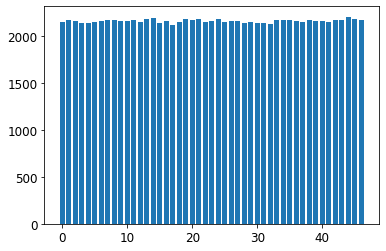

In [124]:
k = len(np.unique(y_train))
plt.bar(np.arange(k), np.array(table_counts).reshape(k))
plt.show()

In [125]:
print("Maxim pixel = ", np.max(X_train))

n = len(X_train)
prop_greater = np.zeros((2, 28, 28)) # axis0 = pixel (0, 150, 250, mean, sd)

for row in range(X_train.shape[1]):
    for col in range(X_train.shape[2]):
        prop_greater[0, row, col] = np.count_nonzero(X_train[:, row, col] > 150)
        prop_greater[1, row, col] = np.mean(X_train[:, row, col])

Maxim pixel =  255


In [10]:
def plot_img_cb(data, title = ""):
    plt.imshow(data)
    plt.axis("off")
    plt.colorbar()
    plt.title(title)
    plt.show()

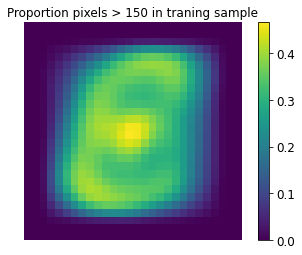

In [127]:
plot_img_cb(prop_greater[0] / n, "Proportion pixels > 150 in traning sample")

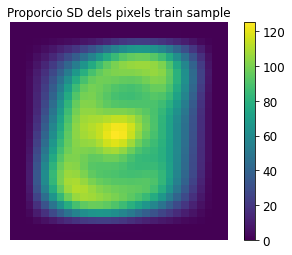

In [128]:
plot_img_cb(prop_greater[1], "Proporcio SD dels pixels train sample")

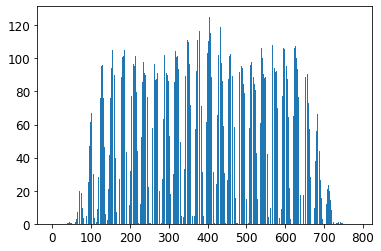

In [129]:
plt.bar(np.arange(28*28), prop_greater[1].reshape(28*28))
plt.show()

## Plotting images

In [12]:
def label_to_letter(label, tipus = "byclass"):
    if tipus == "byclass" or tipus == "mnist" or tipus == "digits":        
        if label >= 0 and label <= 9:
            return label
        elif label >= 10 and label <= 35:
            return chr(label + 55)
        elif label >= 36 and label <= 61:
            return chr(label + 61)
        else:
            raise ValueError("Label '{}' fora dels limits".format(label))

    elif tipus == "bymerge" or tipus == "balanced":
        bymerge_dic = [
            "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", 
            "A", "B", "C/c", "D", "E", "F", "G", "H", "I/i", "J/j", 
            "K/k", "L/l", "M/m", "N", "O/o", "P/p", "Q", "R", "S/s", "T", 
            "U/u", "V/v", "W/w", "X/x", "Y/y", "Z/z", "a", "b", "d", "e", 
            "f", "g", "h", "n", "q", "r", "t"]
        return bymerge_dic[label]

    elif tipus == "letters":
        return chr(label + 55 + 10 - 1)

label_to_letter(1)

1

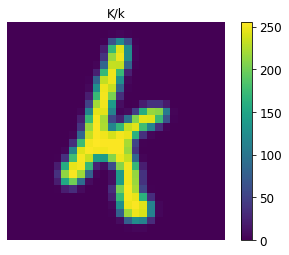

In [156]:
sample_images = X_train[y_train == 20][:10]
plot_img_cb(sample_images[4], label_to_letter(20, tipus = "balanced"))

In [157]:
def plot_img_gray(data, title = "", cmap = "binary", interpolation = "nearest", fontsize = 12):
    plt.imshow(data, cmap = cmap, interpolation = interpolation)
    plt.axis("off")
    plt.title(title, fontsize = fontsize)

def plot_images(images, labels, rows = 5, cols = 5, size_mult = 1.2, tipus = "byclass"):
    plt.figure(figsize = (cols * size_mult, rows * size_mult))
    for row in range(rows):
        for col in range(cols): 
            index = cols * row + col
            plt.subplot(rows, cols, index + 1)
            plot_img_gray(images[index], title = label_to_letter(labels[index], tipus = tipus))
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.show()

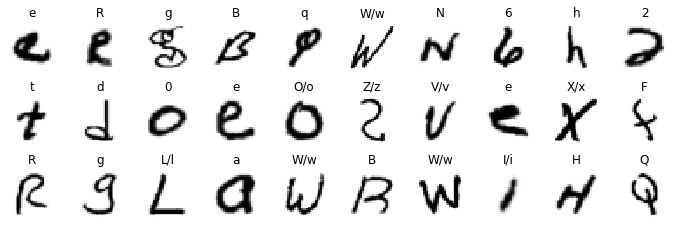

In [191]:
plot_images(X_train[3000:], y_train[3000:], rows = 3, cols = 10, tipus = "balanced")

In [177]:
img_order, labels = [], []
k = len(np.unique(y_train))

for label in range(k):
    data = X_train[y_train == label]
    img_order.append(data[:8])
    labels.append(np.repeat(label, 8))

img_order = np.concatenate(img_order, axis = 0)
labels = np.concatenate(labels, axis = 0)

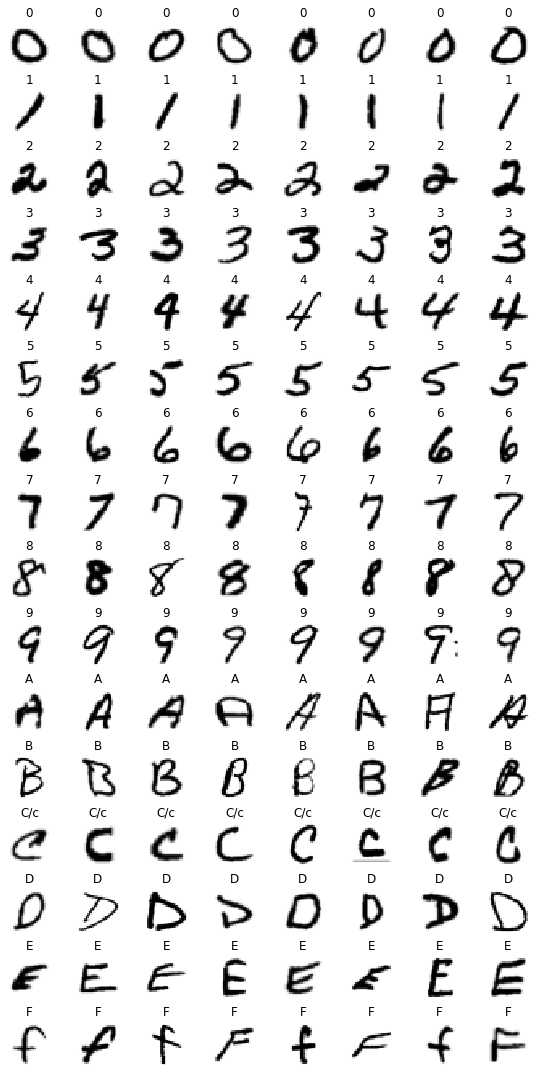

In [186]:
plot_images(img_order[:16*8], labels[:16*8], rows = 16, cols = 8, tipus = "balanced")

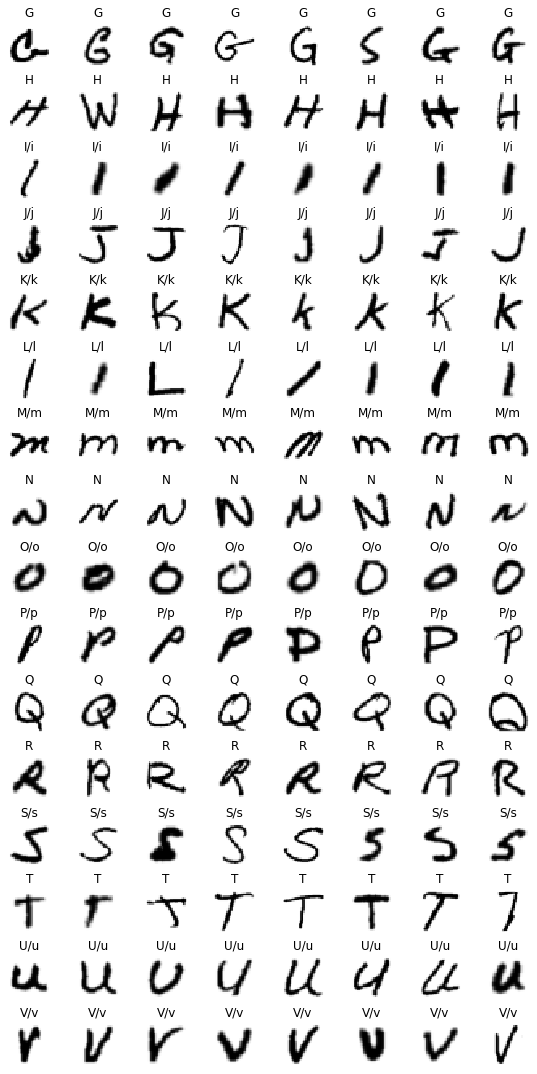

In [188]:
plot_images(img_order[(16*8):(16*8*2)], labels[(16*8):(16*8*2)], rows = 16, cols = 8, tipus = "balanced")

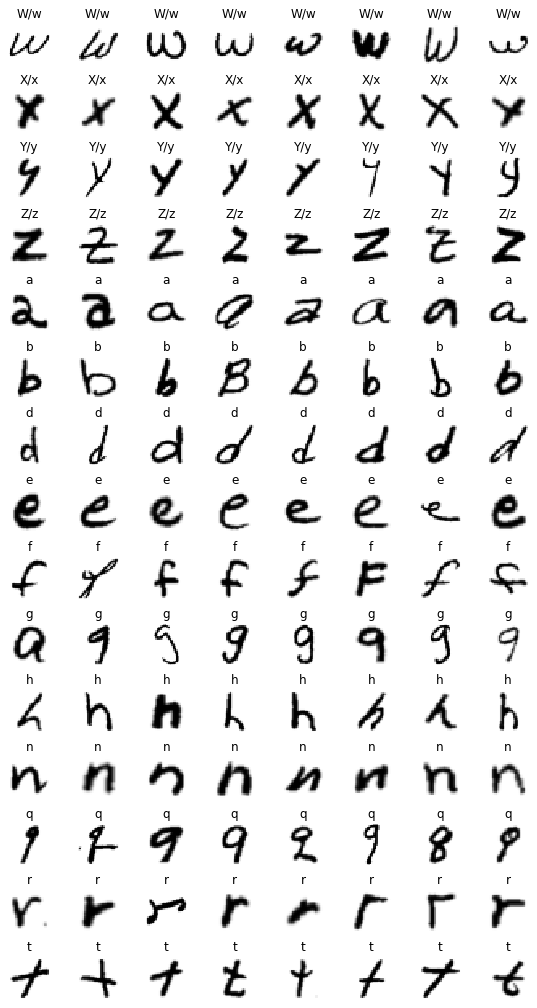

In [189]:
plot_images(img_order[(16*8*2):], labels[(16*8*2):], rows = 15, cols = 8, tipus = "balanced")

In [ ]:
n = len(X_train)
prop_greater = np.zeros((2, 28, 28)) # axis0 = pixel (0, 150, 250, mean, sd)

for row in range(X_train.shape[1]):
    for col in range(X_train.shape[2]):
        prop_greater[0, row, col] = np.count_nonzero(X_train[:, row, col] > 150)
        prop_greater[1, row, col] = np.mean(X_train[:, row, col])


def plot_img_cb(data, title = ""):
    plt.imshow(data)
    plt.axis("off")
    plt.colorbar()
    plt.title(title)
    plt.show()

In [23]:
k = len(np.unique(y_train))
mean_by_class = np.zeros((k, 28, 28)) # 49 per fer imatge 7x7

for label in range(k):
    data = X_train[y_train == label]
    for row in range(28):
        for col in range(28):
            mean_by_class[label, row, col] = np.mean(data[:, row, col])

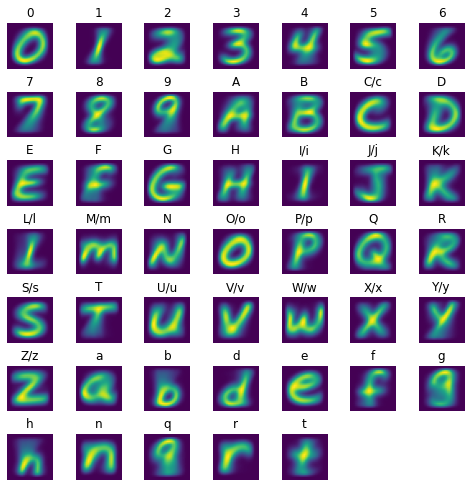

In [27]:
def plot_images_2(images, labels, rows = 5, cols = 5, size_mult = 1.2, tipus = "byclass"):
    plt.figure(figsize = (cols * size_mult, rows * size_mult))
    for row in range(rows):
        for col in range(cols): 
            index = cols * row + col
            if index >= len(images):
                break
            plt.subplot(rows, cols, index + 1)
            plt.imshow(images[index])
            plt.axis("off")
            plt.title(label_to_letter(labels[index], tipus = tipus), fontsize = 12)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.show()

plot_images_2(mean_by_class, np.arange(47), rows = 7, cols = 7, tipus = "balanced")

# Projecció reduint la dimensió

reference help: https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb

# PCA


In [59]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance = 0.05, images = None, figsize = (13, 10), tipus = "balanced"):
    X_normalized = MinMaxScaler().fit_transform(X)
    labels = np.unique(y)
    k = len(labels)
    neighbors = np.array([[k, k]])

    plt.figure(figsize = figsize)
    cmap = mpl.cm.get_cmap("jet")
    for label in labels:
        plt.scatter(X_normalized[y == label, 0], X_normalized[y == label, 1], c = [cmap(label / (k - 1))])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis = 1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], label_to_letter(y[index], tipus = tipus),
                color = cmap(y[index] / (k - 1)), fontdict = {"weight": "bold", "size" : 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap = "binary"), image_coord)
                ax.add_artist(imagebox)



In [75]:
print(list_datasets())
tipus = "balanced"

X_full_train, y_full_train = extract_training_samples(tipus)
X_test, y_test = extract_test_samples(tipus)

X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size = 0.1, random_state = 123)
# del X_full_train, y_full_train # Free memory

X_visual = X_train[:10000]
y_visual = y_train[:10000]
X_visual.shape

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']


(10000, 28, 28)

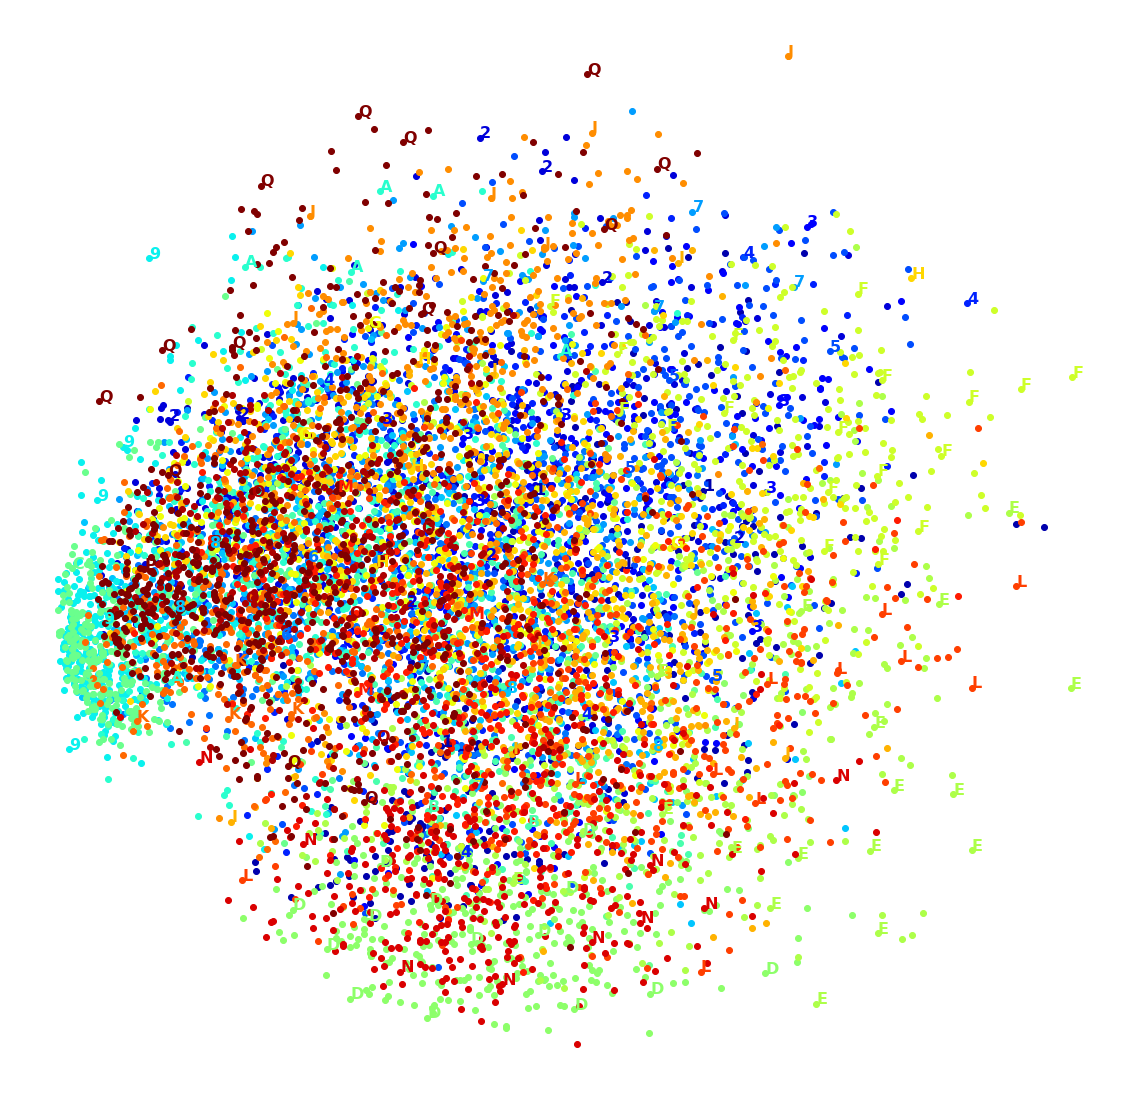

In [72]:
from sklearn.decomposition import PCA

X_pca_reduced = PCA(n_components = 2, random_state = 123).fit_transform(flatten(X_visual))
plot_digits(X_pca_reduced, y_visual, tipus = "digits", figsize = (20, 20))

# TSNE

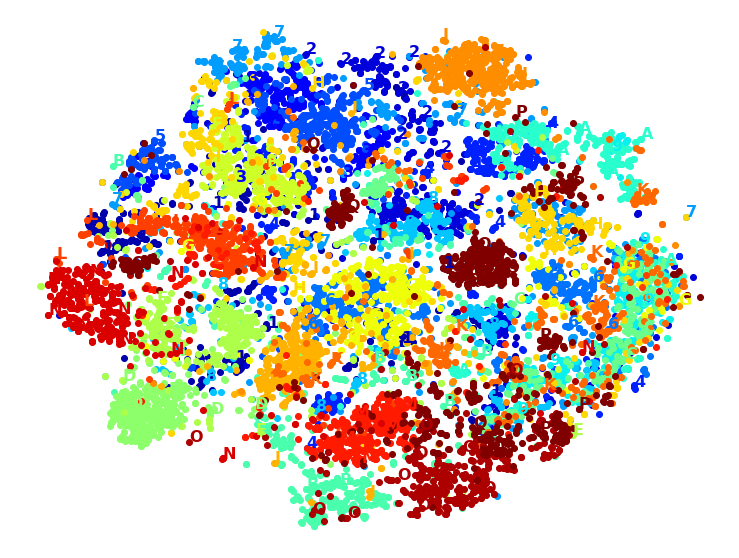

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 123)
X_TSNE_reduced = tsne.fit_transform(flatten(X_visual))

plot_digits(X_TSNE_reduced, y_visual, tipus = "digits")

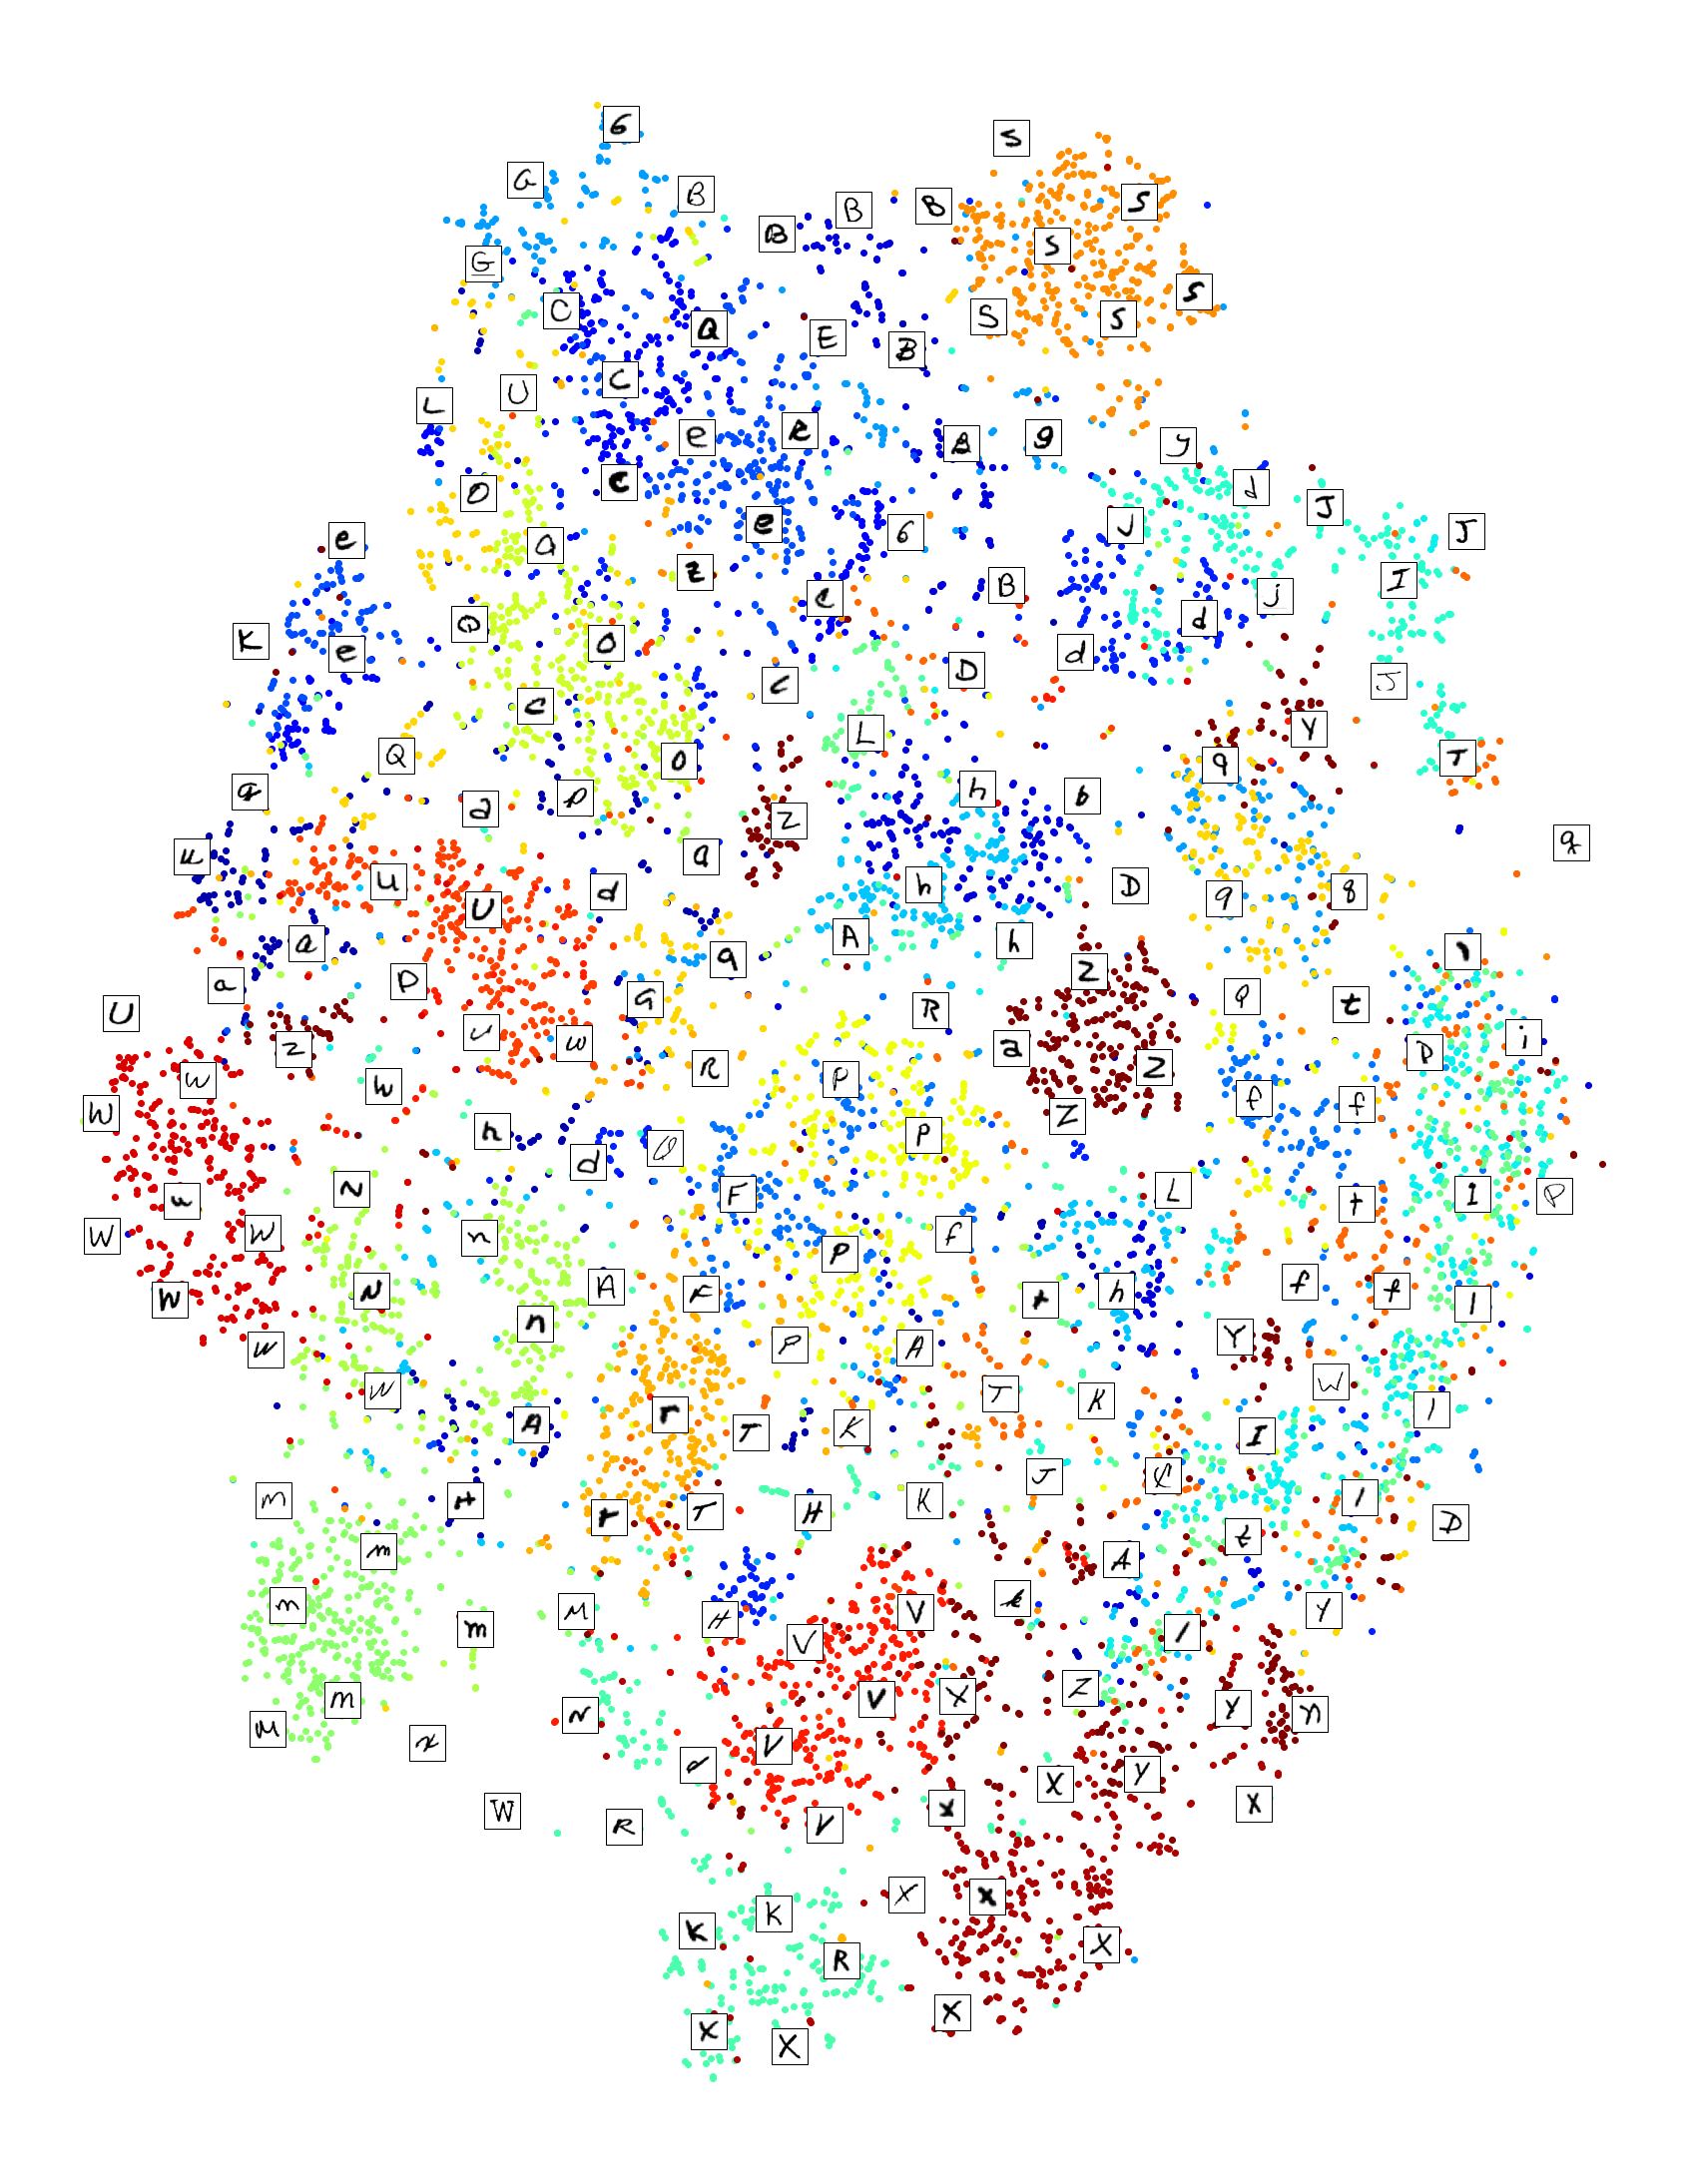

In [74]:
plot_digits(X_TSNE_reduced, y_visual, images = flatten(X_visual), figsize = (30, 40), tipus = "digits")

In [ ]:
# Full data pca + TSNE
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
    ("pca", PCA(n_components = 0.95, random_state = 123)),
    ("tsne", TSNE(n_components = 2, random_state = 123))
])
X_pca_tsne = pca_tsne.fit_transform(flatten(X_train))

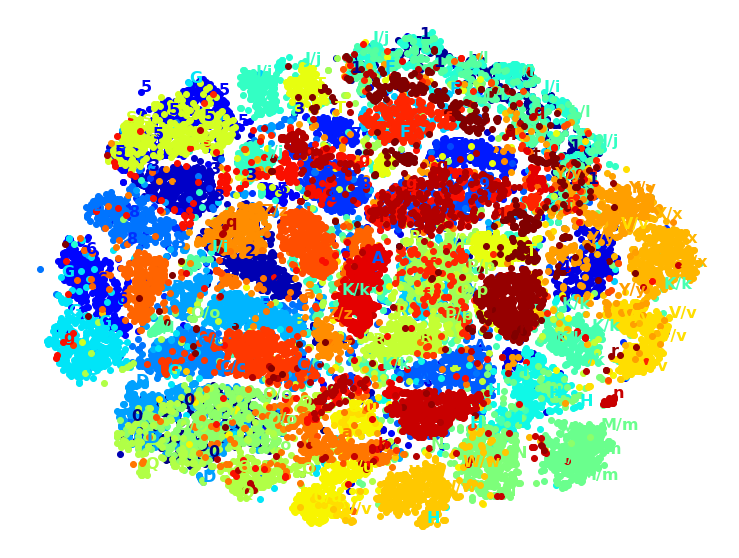

In [86]:
plot_digits(X_pca_tsne[:20000], y_train[:20000])
plt.show()

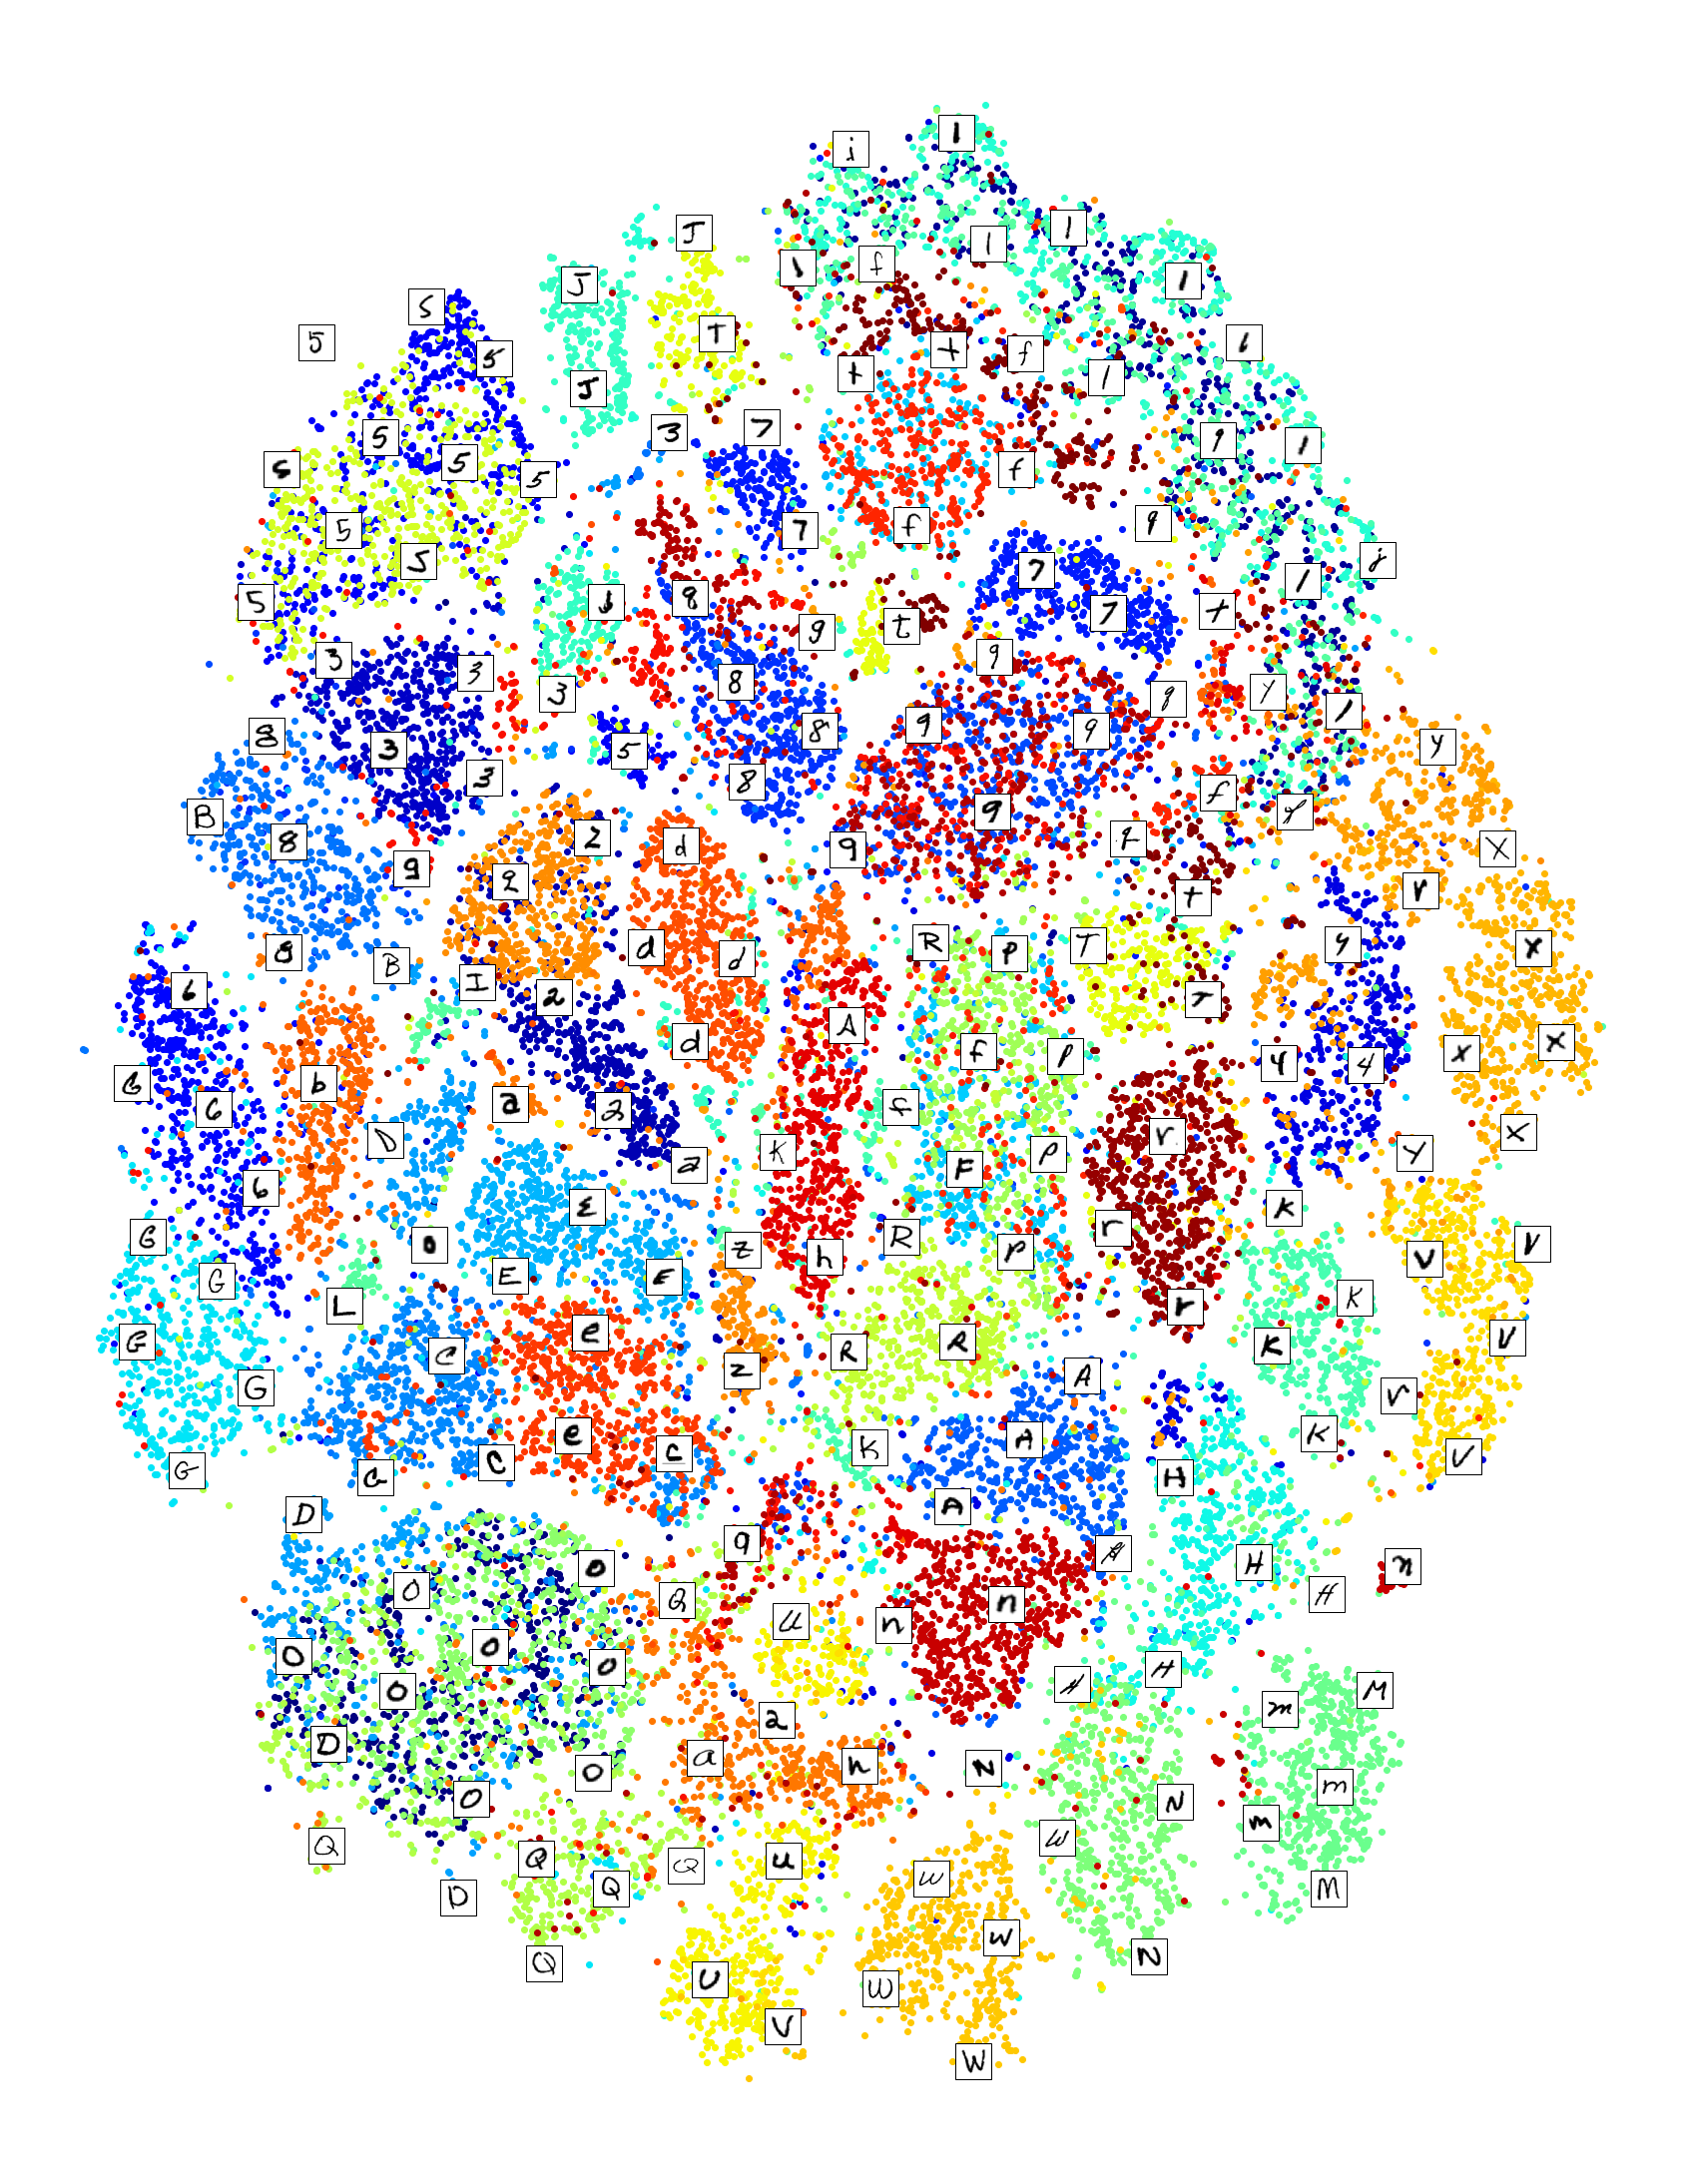

In [89]:
n = 30000
plot_digits(X_pca_tsne[:n], y_train[:n], images = flatten(X_train[:n]), figsize = (30, 40), tipus = "digits")